# Explore loss functions over probability distributions

In [65]:
from __future__ import print_function
from __future__ import division
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from IPython.display import display
import scipy as sp
%matplotlib inline

## Generate data

In [25]:
def gen_random_prob(dim):
    random_vals = np.random.random(dim)
    return random_vals / (np.sum(random_vals))

In [27]:
def gen_random_1hot(dim):
    onehotv = np.zeros(dim)
    onehotv[np.random.choice(range(dim),1)[0]] = 1
    return onehotv

## cross-entropy

In [60]:
def cross_entropy(p, q):
    # Check if q has a zero value where p is non zero
    dim = p.shape[0]
    na_indices = np.logical_and((p > 0),(q == 0))
    non_zero_indices = np.logical_and((p > 0),(q > 0))
    if np.any(na_indices):
        print("p non-zero, with q zero, log will fail")
    else:
        inter_med = -1 * (p[non_zero_indices] * np.log(q[non_zero_indices]))
        return np.sum(inter_med)

In [66]:
def kl(p, q):
    return sp.stats.entropy(p,q)

## test case

In [71]:
def test_1():
    p = gen_random_1hot(5)
    q = gen_random_1hot(5)
    print(p,q)
    print(cross_entropy(p,q))
    p = gen_random_prob(5)
    q = gen_random_prob(5)
    print(p,q)
    print(cross_entropy(p,q))
    print(p,q)
    print(kl(p,q))
    print(kl(q,p))

In [72]:
test_1()

[ 0.  0.  0.  0.  1.] [ 0.  0.  0.  1.  0.]
p non-zero, with q zero, log will fail
None
[ 0.21502422  0.05419713  0.23736826  0.30384162  0.18956877] [ 0.11704762  0.06256256  0.33722969  0.2352546   0.24790553]
1.57357198096
[ 0.21502422  0.05419713  0.23736826  0.30384162  0.18956877] [ 0.11704762  0.06256256  0.33722969  0.2352546   0.24790553]
0.0665134049038
0.0625389645251


## Example

In [81]:
def example_cross_entropy():
    dim = 10
    targetprob = gen_random_prob(dim)
    predprob = gen_random_prob(dim)

    plt.plot(range(dim), targetprob, label="p")
    plt.plot(range(dim), predprob, label="q")
    
    plt.legend(loc='upper left')
    ce = cross_entropy(targetprob, predprob)
    rce = cross_entropy(predprob, targetprob)
    print("cross-entropy: %.3f, reverse cross-entropy: %.3f" % \
          (("na" if not ce else ce), ("na" if not rce else rce)))
    print("KL(p,q): %.3f, KL(q,p): %.3f" %(kl(targetprob, predprob),kl(predprob,targetprob)))

cross-entropy: 2.388, reverse cross-entropy: 2.366
KL(p,q): 0.166, KL(q,p): 0.145


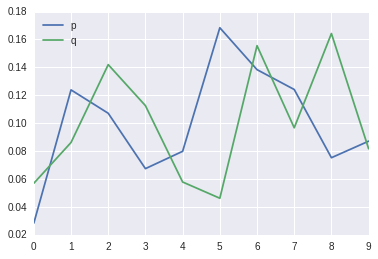

In [82]:
example_cross_entropy()